# Testing different SA methods 5/5
## gcloud
*Important: this just analyzes the results which we save beforehand because the API is rate limit*

In [13]:
# Imports
import csv
import random

In [44]:
# Check how many were labeled correctly
with open('../../../data/interim/sanders_gcloud.csv', 'r', newline='') as in_file:
    csv_reader = csv.reader(in_file, delimiter=',')
    labeled_correctly = 0
    # Load all the tweets into memory
    # Do filtering here
    raw_tweets = [(text, sentiment, id, score, magnitude) for (text, sentiment, id, score, magnitude) in csv_reader 
              if sentiment == 'positive' 
              or sentiment == 'negative']
    # Some tweets couldn't be labeled by the GCloud API, so we filter them out here
    tweets = [(text, sentiment, id, score, magnitude) for (text, sentiment, id, score, magnitude) in raw_tweets 
              if score != "N/A" 
              and magnitude != "N/A" ]
        
    random.shuffle(tweets)

print(max([magnitude for (text, sentiment, id, score, magnitude) in tweets]))
print("%d tweets read, %d valid" % (len(raw_tweets),len(tweets)))

4.099999904632568
945 tweets read, 945 valid


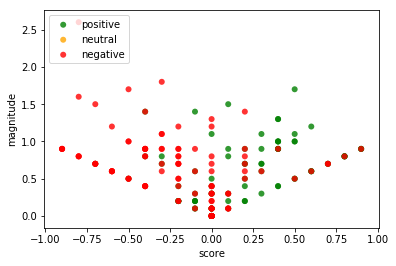

In [45]:
import matplotlib.pyplot as plt

results = {
    "positive":{"color":"green","x":[],"y":[]},
    "neutral":{"color":"orange","x":[],"y":[]},
    "negative":{"color":"red","x":[],"y":[]}
}
                        
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for (text, sentiment, id, score, magnitude) in tweets[:200]:
    results[sentiment]["x"].append(score)
    results[sentiment]["y"].append(magnitude)
    
for key in results:
    ax.scatter(results[key]["x"], results[key]["y"], alpha=0.8, c=results[key]["color"], edgecolors='none', label=key)
 
plt.xlabel('score')
plt.ylabel('magnitude')

plt.legend(loc=2)
plt.savefig('gcloud.pdf', format='pdf')
plt.show()

In [48]:
labeled_correctly = 0
threshold = .9
for (text,sentiment,id, score, magnitude) in tweets:
    if (float(score) < 0 and sentiment == 'negative') or (float(score) >= 0 and sentiment == 'positive'):
        labeled_correctly += 1

print("Labeled correctly: %d/%d = %.2d percent" % (labeled_correctly, len(tweets), labeled_correctly/len(tweets)*100))
labeled_correctly/len(tweets)*100

Labeled correctly: 667/945 = 70 percent


70.58201058201058

In [47]:
len([tweet for tweet in tweets if tweet[1] == "neutral"])/len(tweets)*100

0.0